# DDA3020 Linear Regression Example

*Yihao Peng     yihaopeng@link.cuhk.edu.cn*

*School of Data Science, The Chinese University of Hongkong, Shenzhen*

*2024.02.02*

This notebook is to give a basic example of linear regression workflow with sklearn for your homework. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load datasets and check data informaction

In [2]:
#Two common ways to load data
#1.Load data from csv file using pandas
data = pd.read_csv('./diabetes.csv') # Use pandas to load data, it will create dataframe for you
#2.Load data from sklearn package
from sklearn import datasets
dataset = datasets.load_diabetes(as_frame=True) # Set as_frame to True, it will create dataframe for you
data = dataset['frame']

In [3]:
#Check data information
data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
data.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

### Data Visualization with seaborn

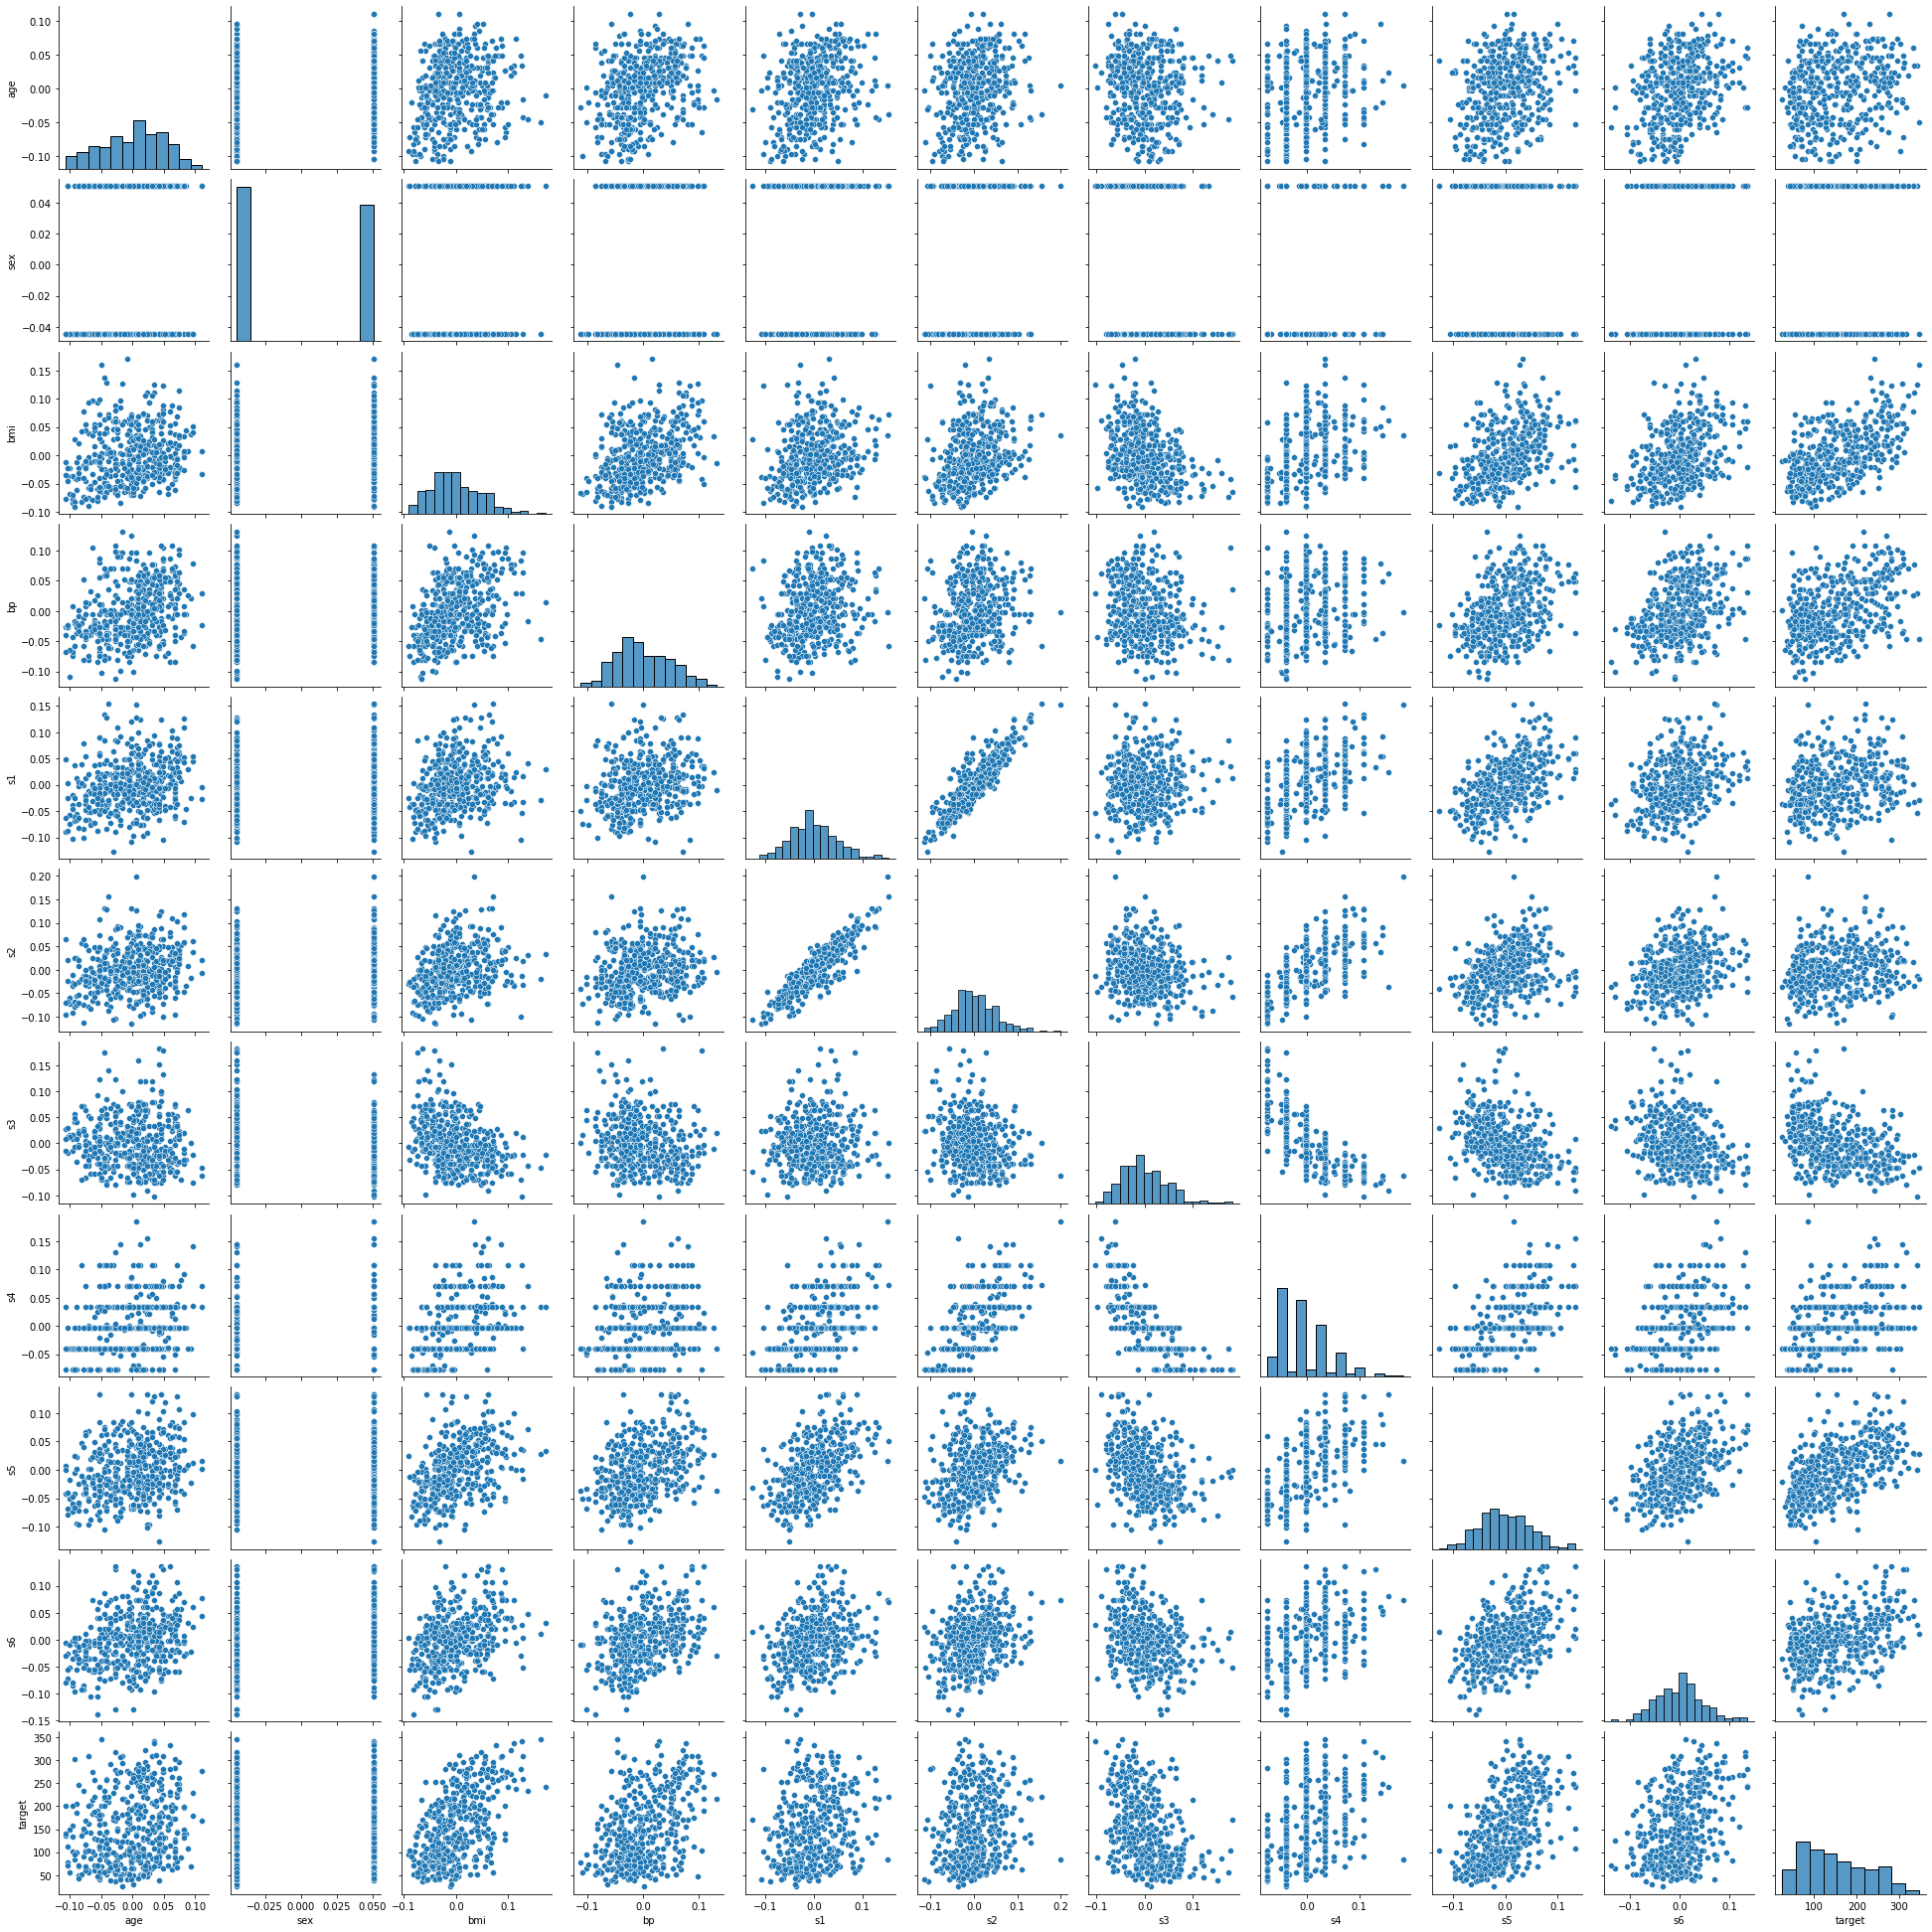

In [6]:
sns.pairplot(data)
# For dataset with category varibales, please read the pairplot document: https://seaborn.pydata.org/generated/seaborn.pairplot.html and pay attention to the 'hue' parameter

<Axes: >

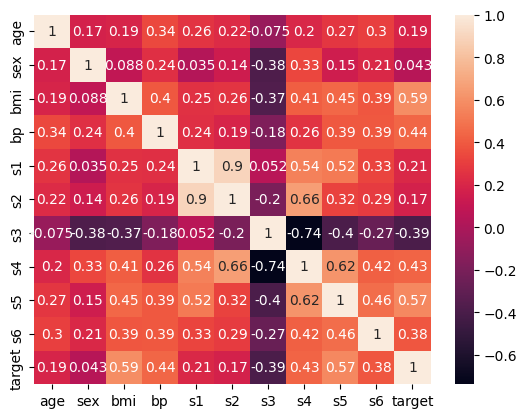

In [7]:
sns.heatmap(data.corr(), annot=True)

### Linear regression workflow with sklearn

In [8]:
# First convert dataset from dataframe in pandas into narray in numpy and seperate the predictors and target
X = data[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].to_numpy()
y = data['target'].to_numpy()

In [9]:
# Split dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3020)

In [10]:
# Train and predict with linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [11]:
# Evaluate the fitted model with MSE
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_pred_train, y_train)
MSE_test = mean_squared_error(y_pred_test, y_test)
print("MSE_train:", MSE_train)
print("MSE_test:", MSE_test)

MSE_train: 2869.956175111417
MSE_test: 2919.930041654827


### Supplementary: Usage of ColumnTransformer and OneHotEncoder
ColumnTransformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

OneHotEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X = np.array(['Category A', 'Category B', 'Category C']*100).reshape(300,1) #Create a category column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))